<a href="https://www.kaggle.com/code/aowada/demo-code-class-13?scriptVersionId=127718257" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# New imports!
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary/Salary.csv


# Let's Explore the Data!

In [2]:
# .read_csv is going to take our .csv file and create a pandas dataframe
df_salary = pd.read_csv('/kaggle/input/salary/Salary.csv')

df_salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


# Plot the data

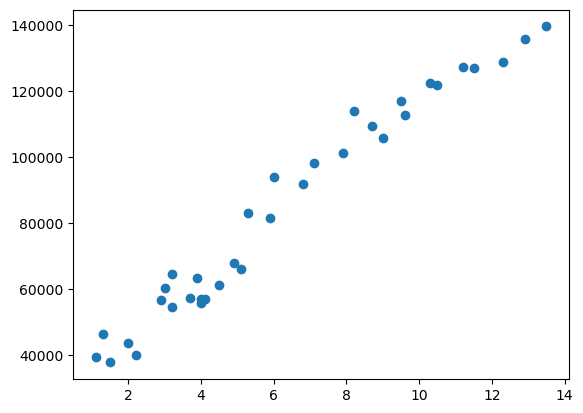

In [3]:
# X axis, aka our dependent variable
years_experience = df_salary["YearsExperience"].values

# y axis, aka our independent variable
salary = df_salary["Salary"].values

plt.scatter(years_experience, salary)
plt.show()

# Let's do some linear regression!

In [4]:
# Shape refers to the size and dimensionality 
# Size = number of elements
# Dimensions = amount of nesting
df_salary.shape



(35, 2)

In [5]:
# Before Reshape
print(years_experience)
print(years_experience.shape)

print("")
print("")

# Reshaping our data
years_experience = years_experience.reshape(-1, 1)
print(years_experience)
print(years_experience.shape)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5 11.2 11.5 12.3 12.9 13.5]
(35,)


[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]
 [11.2]
 [11.5]
 [12.3]
 [12.9]
 [13.5]]
(35, 1)


In [6]:
print("The shape of salary is:")
print(salary.shape)  # y axis, salary, dependent variable, it's 1 dimension
print("")
print("The shape of years_experience is:")
print(years_experience.shape)  # X axis, years of experience, independent variable, 2 dimensions

The shape of salary is:
(35,)

The shape of years_experience is:
(35, 1)


In [7]:
model = LinearRegression().fit(years_experience, salary)

model

LinearRegression()

# Now we can use the model to make a prediction

In [8]:
prediction = model.predict(years_experience) # 
prediction

array([ 38464.6613463 ,  40211.04955571,  41957.43776513,  46323.40828866,
        48069.79649807,  54182.15523101,  55055.34933572,  56801.73754513,
        56801.73754513,  61167.70806866,  62914.09627808,  63787.29038278,
        63787.29038278,  64660.48448749,  68153.26090631,  71646.03732514,
        73392.42553455,  75138.81374396,  80377.9783722 ,  81251.17247691,
        88236.72531456,  90856.30762868,  97841.86046633, 100461.44278044,
       104827.41330398, 107446.99561809, 111812.96614163, 112686.16024633,
       118798.51897928, 120544.90718869, 126657.26592163, 129276.84823575,
       136262.4010734 , 141501.56570164, 146740.73032988])

# Let's plot it!

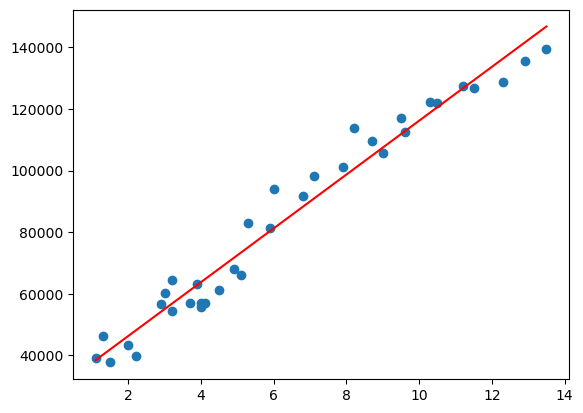

In [9]:
plt.scatter(years_experience, salary)
plt.plot(years_experience, prediction, color="red")
plt.show()

# Create a Test / Train split!

In [10]:
X_train, X_test, y_train, y_test = train_test_split(years_experience, salary, test_size=.2, train_size=.8, random_state=100)
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

X_train shape (28, 1)
y_train shape (28,)
X_test shape (7, 1)
y_test shape (7,)


# Plot the training data

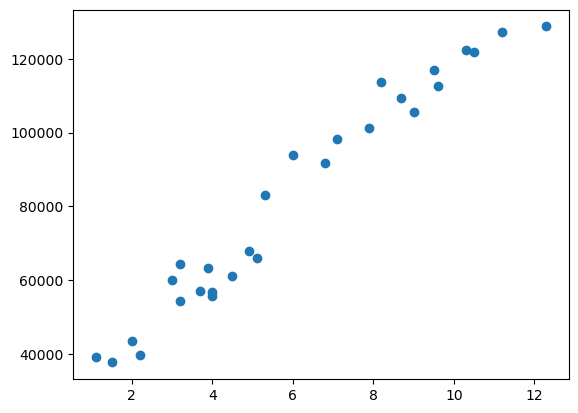

In [11]:
plt.scatter(X_train, y_train)

# Plot the testing data

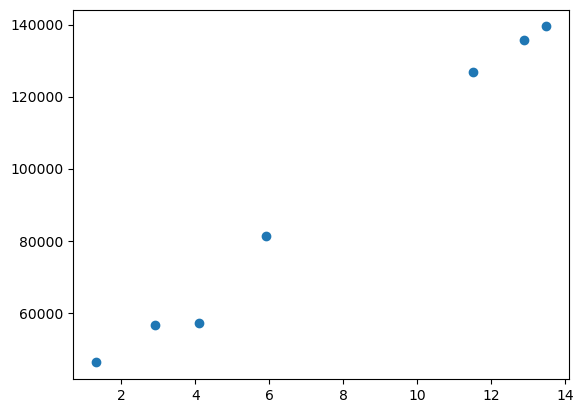

In [12]:
plt.scatter(X_test, y_test)

In [13]:
lm = LinearRegression()
lm.fit(X_train, y_train)  # we train on the 28 training points

# Last leap of logic!
# y_predict IS our prediction! and we will compare it to y_test!
# y_test are the ANSWERS
y_predict = lm.predict(X_test) # x_test are the years of experience, our model hasn't seen yet!

# Predictions:
print(y_predict)
# Answers:
print(y_test)

[145190.21247692 150708.3951762  132314.45284525  53220.50082218
  38505.34695742  64256.86622075  80811.4143186 ]
[135675 139465 126756  56642  46205  57081  81363]


In [14]:
print(f"Train accuracy {round(lm.score(X_train, y_train)*100,2)}%" )
print(f"Test accuracy {round(lm.score(X_test, y_test)*100,2)}%" )

Train accuracy 96.07%
Test accuracy 96.31%
